# Publication Figures, DeepNeuro

This Colab Notebook displays code to reproduce several of the figures available in DeepNeuro's pending manuscript submission. Some figures are supplemented with the graphic design tool Figma, or with the medical image visualization tool 3DSlicer; these aspects are not reproduced here.

Before running code to generate these figures, you must run the installation and data download code below.

In [4]:
""" This code is meant to be run in Google CoLab. Google CoLab is an online
    coding environment that allows users limited access to GPUs, and pre-installs
    many Python libraries required for deep learning. To begin, we install DeepNeuro
    via the "pip" package manager, and download a copy of 3DSlicer. These installation
    steps can be avoided if you are using a Docker or Singularity container with DeepNeuro
    installed.
"""

# Install DeepNeuro
!pip install deepneuro

# Install Slicer
!SLICER_URL="http://download.slicer.org/bitstream/561384" && \
    curl -v -s -L $SLICER_URL | tar xz -C /tmp && \
    mv /tmp/Slicer* /opt/slicer
export PATH=$PATH:/opt/slicer
    
# Import additional tools for Colab
from google.colab import files

/usr/local/lib/python2.7/dist-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.DeprecatedIn23,
/usr/local/lib/python2.7/dist-packages/pip/_vendor/urllib3/util/ssl_.py:369: SNIMissingWarning: An HTTPS request has been made, but the SNI (Server Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  SNIMissingWarning
/usr/local/lib/python2.7/dist-packages/pip/_vendor/urllib3/util/ssl_.py:160: InsecurePlatformWarning: A true SSLContext object is not available. This prevents url

In [6]:
""" Code to download sample cases that will be used for the remainder
    of this notebook. The exact cases may differ from those presented
    in the manuscript."""

import deepneuro

from deepneuro.load import load
load('sample_gbm_dicom', output_datapath='./Sample_Data')

'./Sample_Data/TCGA_GBM_DICOM.zip'

# Figure 2

In [2]:
""" This code is meant to be run in Google CoLab. Google CoLab is an online
    coding environment that allows users limited access to GPUs, and pre-installs
    many Python libraries required for deep learning.
"""

from deepneuro.data import DataCollection
from deepneuro.preprocessing import *
from deepneuro.utilities import check_data

input_data = {'input_data': ['./Sample_Data/TCGA-02-0006/6-AX T1 POST-26504', 
                             './Sample_Data/TCGA-02-0006/4-AX FLAIR-23922']}

data_collection = DataCollection()
data_collection.add_case(input_data, case_name='Figure 1 Case')

dicom_converter = DICOMConverter(data_groups=['input_data'])
data_collection.append_preprocessor(dicom_converter)
check_data(data_collection=data_collection)

# bias_correction = N4BiasCorrection(data_groups=['input_data'])
# registration = Registration(data_groups=['input_data'], reference_channel=0)
# skull_stripping = SkullStrip_Model(data_groups=['input_data'], reference_channel=0)


TypeError: list indices must be integers, not tuple

# Figure 3

In [2]:
# from deepneuro.data.data_collection import DataCollection

# training_data_sources = {
#     'directories': {
#                 './Sample_Data/GBM_NIFTI/TRAINING':
#                 {'input_data': ['*_flair.nii.gz*', '*_t2.nii.gz*', '*_t1Gd.nii.gz'], 
#                  'ground_truth': ['*GlistrBoost_ManuallyCorrected.nii.gz']}},
# }

# training_data = DataCollection(data_sources=training_data_sources, verbose=True)

In [3]:
# # We start off with some code to making plotting in Juypter/Colab Notebooks work correctly.
# %matplotlib inline
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [20, 10]

# from deepneuro.utilities.visualize import check_data

# figure = check_data(data_collection=training_data, viz_rows=1, batch_size=1, mosaic_rows=4, mosaic_columns=8, 
#                     viz_mode_3d='mosaic', colorbar=False,
#                     title="Glioblastoma Visualization Example",
#                     subplot_titles={'input_data':['FLAIR', 'T2', 'Post-Contrast T1'], 'ground_truth':
#                                   ['Multi-Tissue Glioblastoma Segmentation']})

('Found', 3200, 'cases..')
('Found', 1600, 'cases..')
('Found', 1, 'cases..')
Epoch 1/18
40/40 [==============================] - 33s 827ms/step - loss: 1.3073 - categorical_accuracy: 0.5821

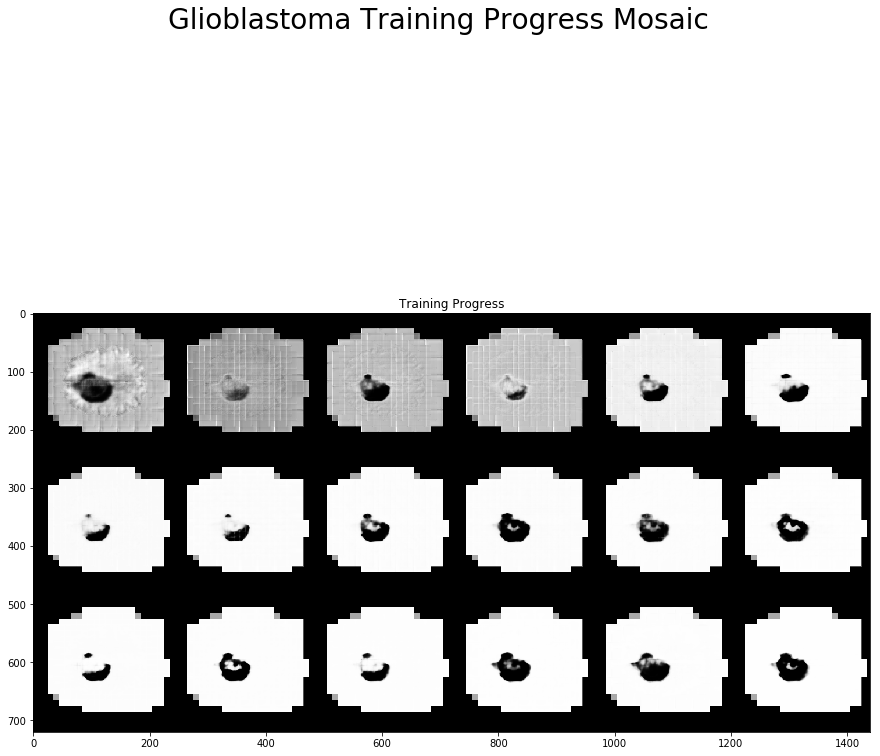

(18, 240, 240, 1)
4
18
3 6
(18, 240, 240, 1)


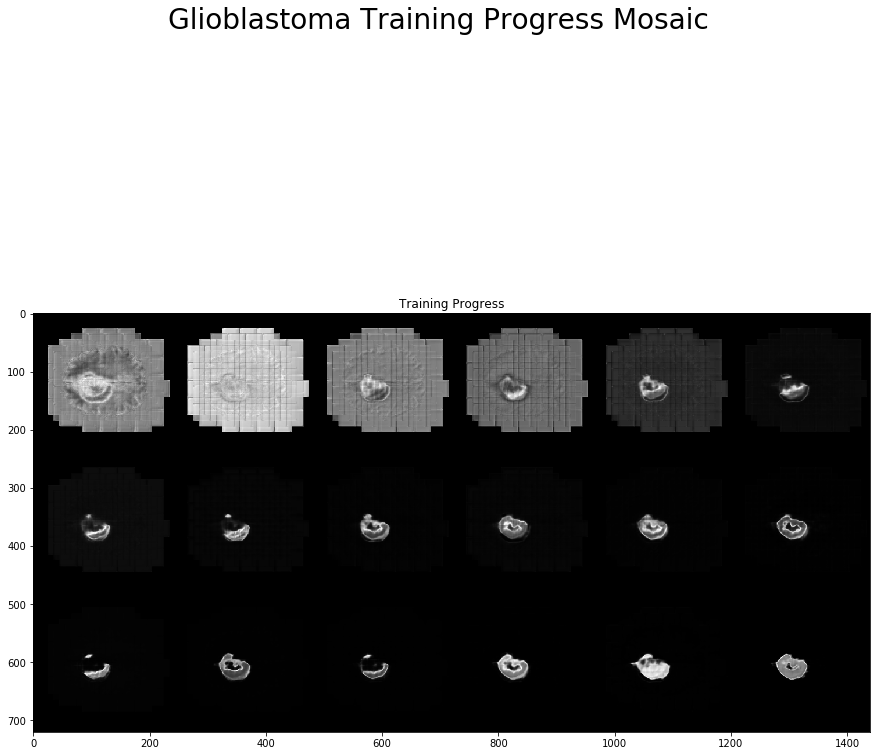

(18, 240, 240, 1)
4
18
3 6
(18, 240, 240, 1)


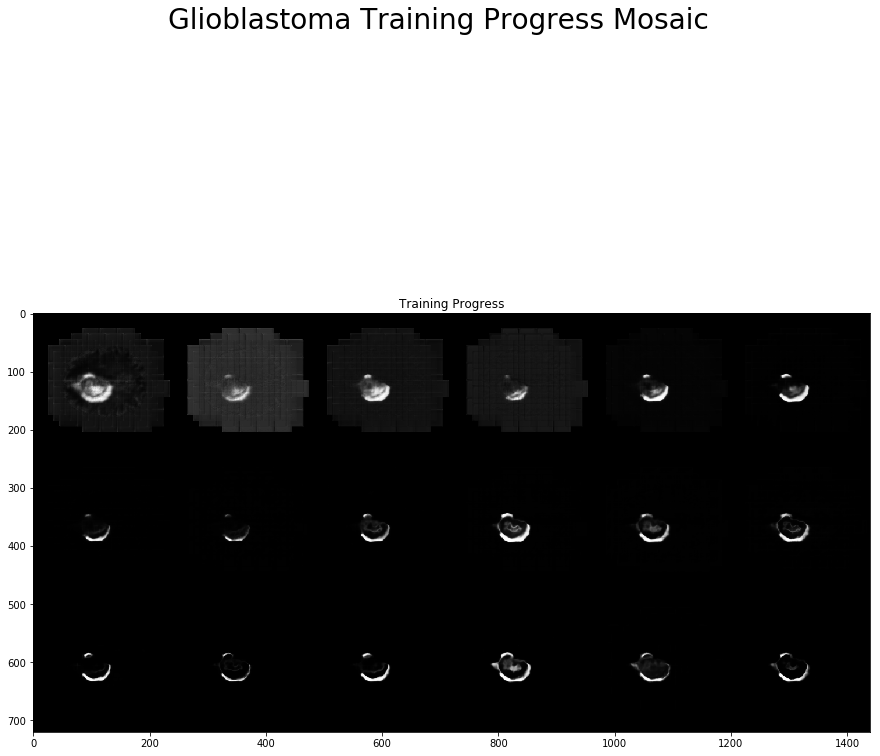

(18, 240, 240, 1)
4
18
3 6
(18, 240, 240, 1)


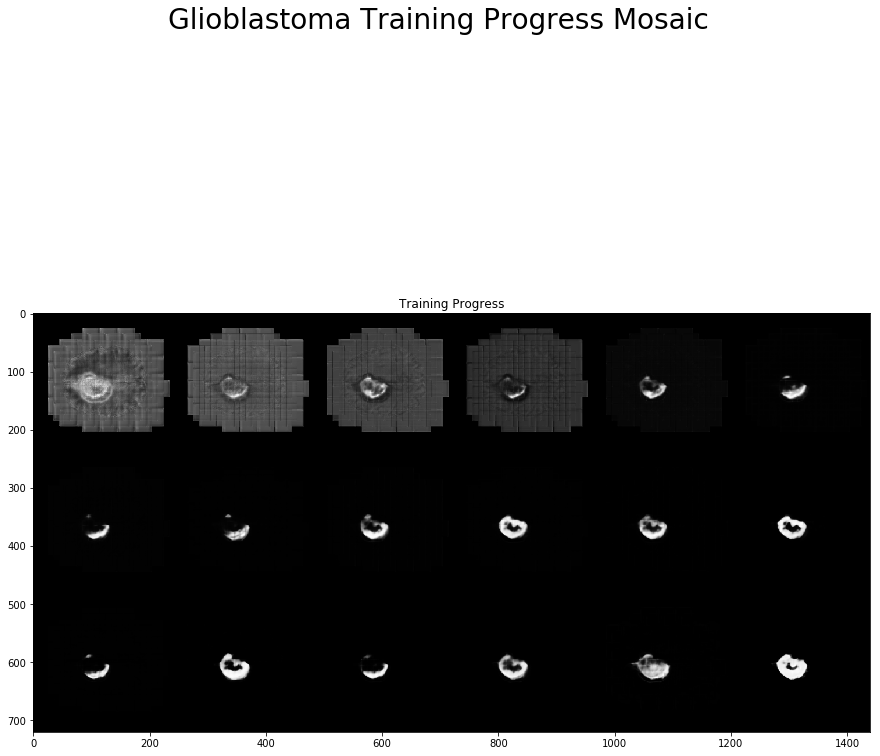

(18, 240, 240, 1)


In [28]:
import os
import warnings

warnings.filterwarnings("ignore", message=".*dtype size changed.*")
warnings.filterwarnings("ignore", message=".*keepdims.*")
warnings.filterwarnings("ignore", message=".*pydicom.*")

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

# This code will make results plotting look nicer in Jupyter/Colab.
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

from deepneuro.outputs.inference import ModelPatchesInference
from deepneuro.models.unet import UNet
from deepneuro.data.data_collection import DataCollection

model_parameters = {'input_shape': (32, 32, 32, 4),
                'output_channels': 4,
                'dropout': 0, 
                'batch_norm': True, 
                'initial_learning_rate': 0.001,
                'cost_function': 'categorical_crossentropy',
                'depth': 3,
                'max_filter': 128}

unet_model = UNet(**model_parameters)

training_data = DataCollection(data_sources={'hdf5': 'training.hdf5'})
validation_data = DataCollection(data_sources={'hdf5': 'validation.hdf5'})
testing_data = DataCollection(data_sources={'hdf5': 'testing.hdf5'})

callbacks = ['save_model', # Saves your model every epoch.
             'predict_epoch', # Predicts a full volume every epoch.
             'cyclic_learning_rate',] # Applies cyclical learning rate.

periodic_testing_parameters = {'inputs': ['input_data'],
               'batch_size': 20,
               'output_patch_shape': (30, 30, 30, 1),
               'patch_overlaps': 4,
               'verbose': False}

periodic_testing_output = ModelPatchesInference(**periodic_testing_parameters)

trained_model = 'tumor_segmentation_model.hdf5'

training_parameters = {'input_groups': ['input_data', 'ground_truth'],
                'training_batch_size': 16,
                'num_epochs': 18,
                'training_steps_per_epoch': 40,
                'callbacks': callbacks,
                
                # Save model parameters
                'output_model_filepath': trained_model,
                'save_best_only': False,
                
                # Cyclic learning rate parameters
                'cyclic_base_learning_rate': .001,
                'cyclic_max_learning_rate': .006,
                
                # Periodic testing parameters
                'epoch_prediction_dir': './Test_Model_Outputs',
                'epoch_prediction_data_collection': testing_data,
                'epoch_prediction_object': periodic_testing_output,
                'epoch_prediction_batch_size': 1,
                'epoch_prediction_output_mode': 'mosaic',
                'viz_mode_3d': '2d_slice', 
                'viz_rows': 3, 
                'slice_index': 101,
                'colorbar': False,
#                 'subplot_titles': {'prediction_0': 'Background Training Results', 'prediction_1': 'Necrosis Training Results',
#                                   'prediction_2': 'Edema Training Results', 'prediction_3': 'Enhancing Tumor Training Results', 'prediction': 'Training Results'},
                'title': 'Glioblastoma Training Progress Mosaic'
                }

unet_model.train(training_data, **training_parameters)


('Found', 1, 'cases..')
1
1 1
(1, 240, 240, 155, 4)
(1, 240, 240, 155, 4)


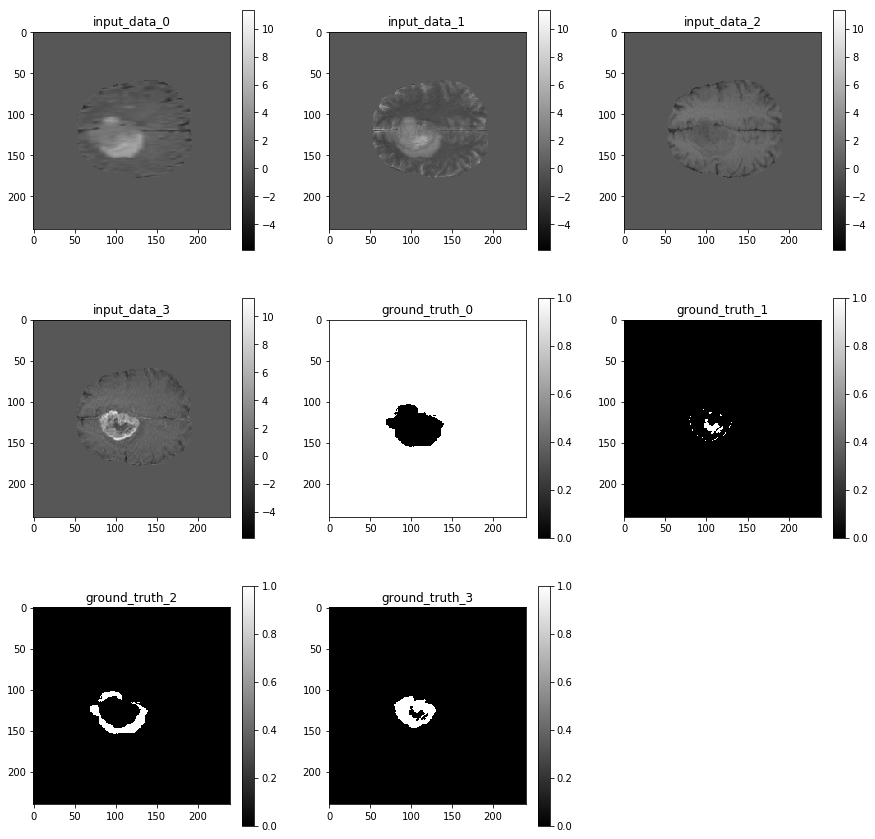

In [19]:
from deepneuro.utilities.visualize import check_data

training_data_sources = {
    'directories': {
                './Sample_Data/GBM_NIFTI/TESTING':
                {'input_data': ['*_flair.nii.gz*', '*_t2.nii.gz*', '*_t1.nii.gz', '*_t1Gd.nii.gz'], 
                 'ground_truth': ['*GlistrBoost_ManuallyCorrected.nii.gz']}},
}

testing_data = DataCollection(data_sources={'hdf5': 'testing.hdf5'})

figure = check_data(data_collection=testing_data, viz_rows=1, batch_size=2, viz_mode_3d='2d_slice', slice_index=101)